# PCA in Generalized Convex Spaces

### phi_alpha-PCA is a robust PCA in the generalized convex spaces

In this package, we find:

  * The projection matrix (F)
  * Eigenvualues, percentage of variance and cumulative percentage of variance
  * Relative contributions of variables
  * Relative contributions of the observations
  * Absolute contributions of the observations (cos²)
  * Search for optimal alpha in order to detect and minimize the influence of outliers
  * 2D graphics of the observations
  * 3D graphics of the observations
  * correlation circle 
  * Example on cars data below


### What do you need for this package ?
* You need your data in an excel file with the extension (.xlsx)
* You also need to put on the fist row the name of the variables and on the first column the name of the observations

### Import phi_alpha-PCA

In [2]:
from ACP_phi_alpha import Pca_alpha

### Import plot utilities: example on cars data

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
from scipy import linalg
from sklearn import preprocessing
import matplotlib.animation as animation
import math

### Import data 

In [15]:
x = pd.read_excel("cars.xlsx", header=0, index_col=0) #import your excel file with your data

### Search for optimal alpha in order to detect and minimize the influence of outliers

In [16]:
alpha = 1 #standard PCA
model = Pca_alpha(alpha)
print("optimal_alpha")
print(model.hotelling(x, 0.1))

optimal_alpha
2.2


### Run the model by setting your own optimal alpha parameter in ]0,10] and != 0 

In [17]:
alpha = 2.2 #optimal alpha
model = Pca_alpha(alpha)

### Correlation circle 

circle of correlation


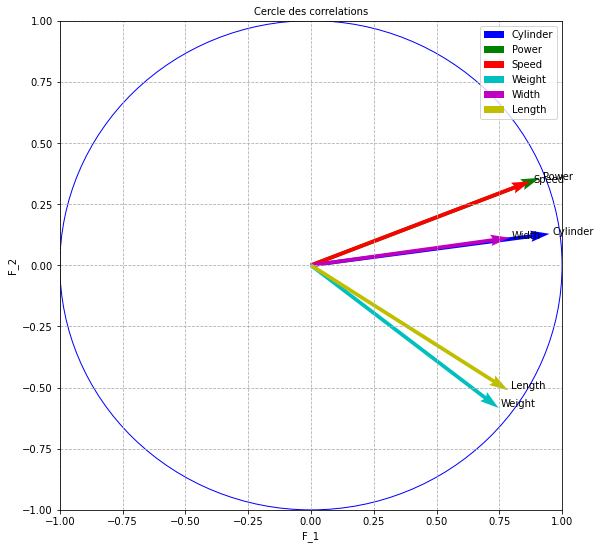

None


In [19]:
print("circle of correlation")
print(model.circle_correlation(x))

### Find the projection matrix (F)

In [20]:
print("projection")
print(model.project(x, alpha))

projection
[[-1.54281509  0.73632116 -0.45765918  0.44172456 -0.20802278  0.48887612]
 [-1.90958097  1.2611019   0.55548359 -0.9647609   0.21387889  0.20087085]
 [-1.15838788  0.91157138  0.63823858 -0.25865668 -0.25852552 -0.70539745]
 [-1.52031068  0.66203487 -0.4513449   0.38769161 -0.2580553   0.56913536]
 [-0.07269504  0.96068283  0.64809947 -0.55533719  0.4012112  -0.56592832]
 [-1.0531733  -0.44552577 -0.44477922  0.54796075  0.28104968  0.30379105]
 [-1.28139693 -0.57888914 -0.67013943  0.62604844 -0.33987635  0.5241112 ]
 [ 0.76365796 -0.7448234   0.53868186  0.61069623 -0.13001343 -0.06839642]
 [ 0.31448964 -0.71747417  0.74694198  0.63488964  0.37193876 -0.38240561]
 [ 0.92275756 -0.70265692  0.44008268  0.83656688  0.18890111 -0.24564512]
 [ 0.8620841  -0.95217767  0.49134347  0.75289519 -0.39572109 -0.35070811]
 [ 1.40906711 -0.79871907  0.6611047   0.43892367 -0.32679527  0.62501701]
 [ 1.42109684 -0.90848082 -0.71395621  0.40711774  0.53851683 -0.26992101]
 [-1.2461101  

### Find the Eigenvualues, the percentage of inertia and the cumulative percentage of inertia

In [21]:
print("Eigenvalues")
print(model.eigenvalues(x))

Eigenvalues
[[  1.96  43.7   43.7 ]
 [  0.93  20.71  64.4 ]
 [  0.69  15.26  79.66]
 [  0.52  11.54  91.2 ]
 [  0.14   3.02  94.22]
 [  0.26   5.78 100.  ]]


### Absolute contributions of the observations

In [22]:
print("absolute contributions of the observations")
print(model.absolute_contributions_observations(x))

absolute contributions of the observations
[['C2' 6.521818514915534 3.0544403909373394 1.8566328404955899
  2.048793293897643 1.722497884534968 4.899824003617121]
 ['Smart' 9.991187468901702 8.959782207812047 2.7351687489782917
  9.773146894795547 1.8208440361221676 0.8272116950295209]
 ['Mini' 3.676621821121606 4.681429215948653 3.6108360939722557
  0.7024937097431125 2.660380303174016 10.201184398695625]
 ['Micra' 6.332943963272783 2.4692145697366907 1.8057546157664126
  1.5782210911323682 2.650711468395669 6.640701774347112]
 ['Clio_V6' 0.014479398562612694 5.19944700245885 3.7232739853470482
  3.2382364132657173 6.407416855471292 6.566072797887173]
 ['Audi_A3' 3.0390694875860444 1.1182598882194477 1.7536004464215673
  3.152781967248145 3.144148627636894 1.8920507172550596]
 ['Peugeot_307' 4.498920419707928 1.8879387581530829 3.9808150612337583
  4.115389207738079 4.598103786503217 5.631572887159664]
 ['Peugeot_407' 1.5978599873057047 3.1253864394823125 2.5722096719177396
  3.916025

### Absolute contributions of the variables

In [23]:
print("absolute contributions of the variables")
print(model.absolute_contributions_variables(x)[0])

absolute contributions of the variables
[['Cylinder' 18.58110680413267 6.985148012078414 12.21583766951254
  11.349670478279652 29.59090091235105 25.641300371095678]
 ['Power' 17.893710301741063 17.68475622084613 8.12439998866286
  8.68149142952098 5.1060687697342715 38.58599563801424]
 ['Speed' 17.236962668447052 17.049287018082406 17.211528200178737
  19.03982690491878 26.112450019369238 16.919650778077994]
 ['Weight' 14.936267693172796 27.611982713326256 12.680181580131741
  24.02275122617001 18.50088837225277 0.5687764568393752]
 ['Width' 15.72927731449335 6.184091771414021 44.23595921307722
  7.1664683436106325 7.917399275197931 7.696123637423151]
 ['Length' 15.622675218013068 24.48473426425278 5.5320933484369155
  29.739791617499943 12.772292651094736 10.58815311854956]]


### Relative contributions of the observations (cos²) 

In [24]:
print("relative contributions of the observations")
print(model.relative_contributions_observations(x))

relative contributions of the observations
[[65.9 15.   5.8  5.4  1.2  6.6]
 [55.6 24.2  4.7 14.2  0.7  0.6]
 [41.8 25.9 12.7  2.1  2.1 15.5]
 [66.1 12.5  5.8  4.3  1.9  9.3]
 [ 0.2 43.2 19.6 14.4  7.5 15. ]
 [56.1 10.  10.  15.2  4.   4.7]
 [51.2 10.4 14.  12.2  3.6  8.6]
 [32.  30.4 15.9 20.5  0.9  0.3]
 [ 5.3 27.7 30.  21.7  7.4  7.9]
 [36.5 21.1  8.3 30.   1.5  2.6]
 [27.1 33.1  8.8 20.7  5.7  4.5]
 [52.9 17.  11.7  5.1  2.8 10.4]
 [52.  21.3 13.1  4.3  7.5  1.9]
 [74.  11.9  1.3 10.3  2.1  0.4]
 [21.9 31.6 11.6 18.8  8.2  7.9]
 [33.  21.1  6.9 15.8  4.1 19.1]
 [52.3 12.3 18.5  4.2  4.8  7.8]
 [56.6  1.3 22.3 13.1  4.1  2.6]
 [49.1 27.2 19.7  1.6  1.4  1.1]
 [47.4 23.  15.5  7.6  0.8  5.6]
 [40.7 36.5 13.4  8.   1.3  0.1]
 [29.9 21.7  5.8 32.7  0.4  9.6]
 [15.6 32.7 26.4 18.1  0.9  6.3]
 [33.2 38.4  3.1  7.3  7.4 10.5]]


### 2D graphics of the observations

plot 2D


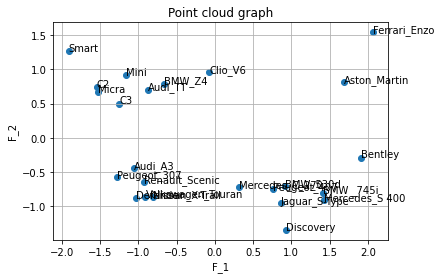

None


In [25]:
print("plot 2D")
print(model.plot2D(x, alpha))

[Stack Abuse](http://stackabuse.com)

### 3D graphics of the observations

plot 3D
None


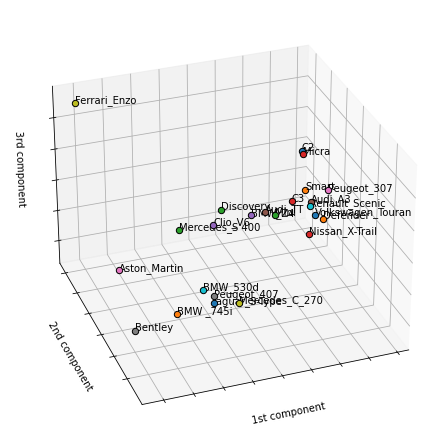

In [14]:
print("plot 3D")
print(model.plot3D(x, alpha))